In [38]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df=pd.read_csv(r"/content/StudentsPerformance.csv")

In [40]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [41]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [42]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [43]:
df.columns=df.columns.str.replace(' ','_')

In [44]:
df

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [45]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [46]:
df['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [47]:
df['parental_level_of_education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [48]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [49]:
df['test_preparation_course'].unique()

array(['none', 'completed'], dtype=object)

In [50]:
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75




```
# This is formatted as code
```

## **Problem Statement - 1**

**Is there a gender based difference in math scores?**

Investigate whether there is a significant difference in math scores male and female students in the dataset

In [51]:
male =df[df['gender']=='male']['math_score']
female =df[df['gender']=='female']['math_score']

In [52]:
#Null hypothesis (He): There is no gender—based di fference In math scores.
#Alternative hypothesis (Ha): There is a gender-based difference in math scores

In [53]:
alpha=0.05

In [54]:
t_stat, p_value = stats.ttest_ind(male,female) # two—sample independent t—test

In [55]:
print(f"t-statistics:{t_stat}")
print(f"p-value:{p_value}")

t-statistics:5.383245869828983
p-value:9.120185549328822e-08


In [56]:
if p_value<alpha:
  print("Reject the null hypothesis")
else:
   print("Reject the null hypothesis")

Reject the null hypothesis


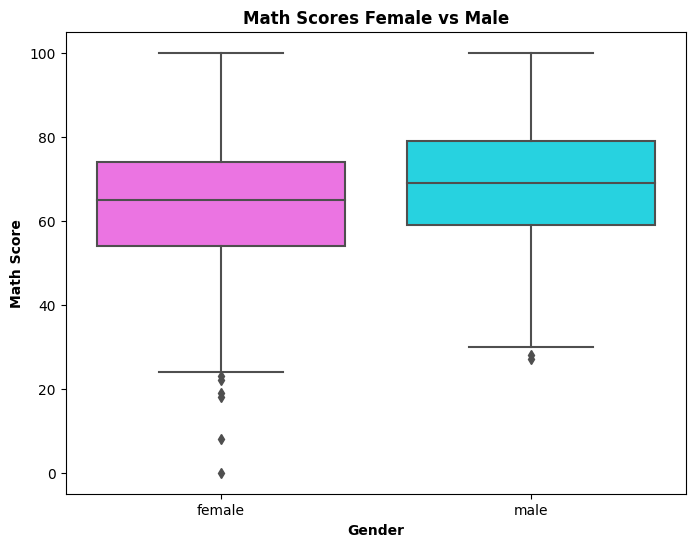

In [57]:
colors = {'male': '#08ECFF', 'female': '#FF60F3'}
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='math_score', data=df, palette=colors)
plt.title('Math Scores Female vs Male', fontweight='bold')
plt.xlabel('Gender', fontweight='bold')
plt.ylabel('Math Score', fontweight='bold')
plt.show()

# **Problem Statement - 2**

 Does parental education level affect writing scores?

Examine whether the parental level of education has a significant impact on the writing scores of students in the dataset.

In [58]:
# Alternative Hypothesis (Ha):
# The alternative hypothesis states that there is a significant difference in writing scores among parental education levels

In [59]:
# Null Hypothesis (H0):
# The null hypothesis states that there is no significant difference in writing scores among parental education levels

In [60]:
result = stats.f_oneway(
    df[df['parental_level_of_education'] == "bachelor's degree"]['writing_score'],
    df[df['parental_level_of_education'] == "some college"]['writing_score'],
    df[df['parental_level_of_education'] == "master's degree"]['writing_score'],
    df[df['parental_level_of_education'] == "associate's degree"]['writing_score'],
    df[df['parental_level_of_education'] == "high school"]['writing_score'],
    df[df['parental_level_of_education'] == "some high school"]['writing_score']
)

In [61]:
alpha = 0.05

In [62]:
print("ANOVA Result:")
print(result)
print("\n")

ANOVA Result:
F_onewayResult(statistic=14.442416127574992, pvalue=1.1202799969771148e-13)




In [63]:
if result.pvalue<alpha:
   print("Reject the null hypothesis")
else:
   print("Fail to reject the null hypothesis")

Reject the null hypothesis


Based on the results of the ANOVA test and a significance level (alpha) of 0.05, we reject the null hypothesis (H0). The data provides sufficient evidence to conclude that there is a significant difference in writing scores among parental education levels

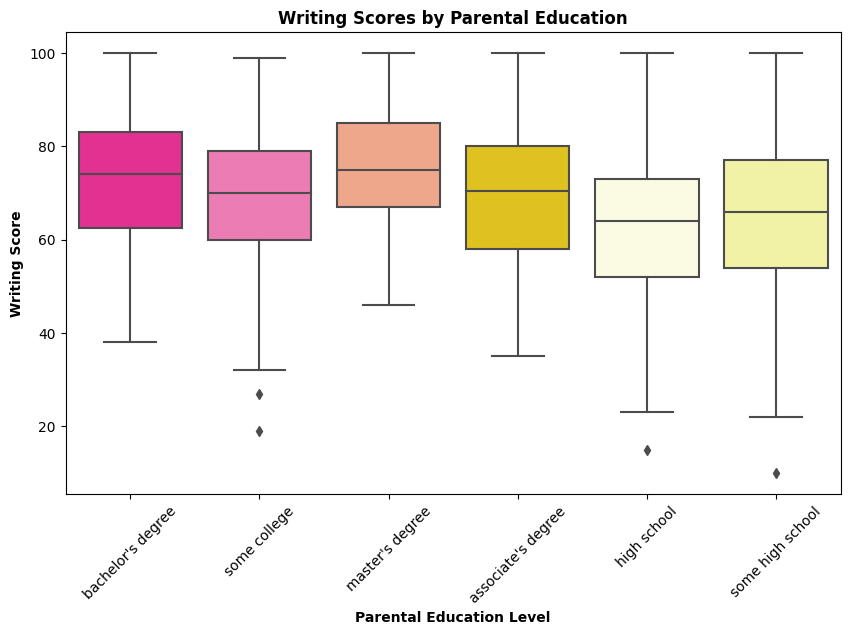

In [64]:
custom_palette = sns.color_palette(["#FF1493", "#FF69B4", "#FFA07A", "#FFD700", "#FFFFE0", "#FFFF99"])
plt.figure(figsize=(10, 6))
sns.boxplot(x='parental_level_of_education', y='writing_score', data=df, palette=custom_palette)
plt.xticks(rotation=45)
plt.title('Writing Scores by Parental Education', fontweight='bold')
plt.xlabel('Parental Education Level', fontweight='bold')
plt.ylabel('Writing Score', fontweight='bold')
plt.show()



post-hoc ( Tukey-Kramer test )

In [65]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [66]:
model = ols('writing_score ~ C(parental_level_of_education)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

In [67]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [68]:
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(df['writing_score'], df['parental_level_of_education'])
result = mc.tukeyhsd()

In [69]:
print("ANOVA Table:")
print(anova_table)
print("\n")

ANOVA Table:
                                       sum_sq     df          F        PR(>F)
C(parental_level_of_education)   15623.225898    5.0  14.442416  1.120280e-13
Residual                        215053.858102  994.0        NaN           NaN




In [77]:
# The p-value associated with C(parental_level_of_education) is less than the significance level (alpha = 0.05)
# This shows that there is a significant difference in writing scores among the parental education levels

# The F-statistic is 14.4424 tells us about the significant difference among groups.

In [70]:
print("Tukey-Kramer Post-Hoc Test Results:")
print(result)

Tukey-Kramer Post-Hoc Test Results:
            Multiple Comparison of Means - Tukey HSD, FWER=0.05             
      group1             group2      meandiff p-adj   lower    upper  reject
----------------------------------------------------------------------------
associate's degree bachelor's degree    3.485 0.2988  -1.2997  8.2696  False
associate's degree       high school  -7.4474    0.0 -11.5638 -3.3311   True
associate's degree   master's degree   5.7816 0.0794  -0.3699 11.9331  False
associate's degree      some college  -1.0557 0.9741  -5.0243  2.9129  False
associate's degree  some high school  -5.0081 0.0095   -9.227 -0.7892   True
 bachelor's degree       high school -10.9324    0.0 -15.8259 -6.0388   True
 bachelor's degree   master's degree   2.2966 0.9246  -4.3999  8.9931  False
 bachelor's degree      some college  -4.5406 0.0726  -9.3106  0.2293  False
 bachelor's degree  some high school  -8.4931    0.0 -13.4732  -3.513   True
       high school   master's degree   1

Based on the Tukey-Kramer test, we conclude that there are significant differences in writing scores among some specific pairs of parental education groups. These differences suggest that parental education level has an impact on writing scores, as indicated by the significant result in the ANOVA test.

# **Problem Statement - 3**

Is there a difference in reading scores based on lunch type?

Investigate whether students who have standard lunch and those with free/reduced lunch have significantly different reading scores.

In [78]:
# null hypothesis (H0): There is no difference in reading scores based on lunch type.
# alternative hypothesis (Ha): There is a difference in reading scores based on lunch type.

In [71]:
standard_lunch_scores = df[df['lunch'] == 'standard']['reading_score']
reduced_lunch_scores = df[df['lunch'] == 'free/reduced']['reading_score']


In [72]:
t_stat, p_value = stats.ttest_ind(standard_lunch_scores, reduced_lunch_scores) # # two-sample independent t-test

In [73]:
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

t-statistic: 7.451056467473455
p-value: 2.0027966545279011e-13


In [74]:
alpha = 0.05

In [75]:
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")


Reject the null hypothesis


It means that there is a statistically significant difference in reading scores between students with a standard lunch and students with a free/reduced lunch. In other words, the type of lunch has an impact on reading scores.

Text(0, 0.5, 'Reading Score')

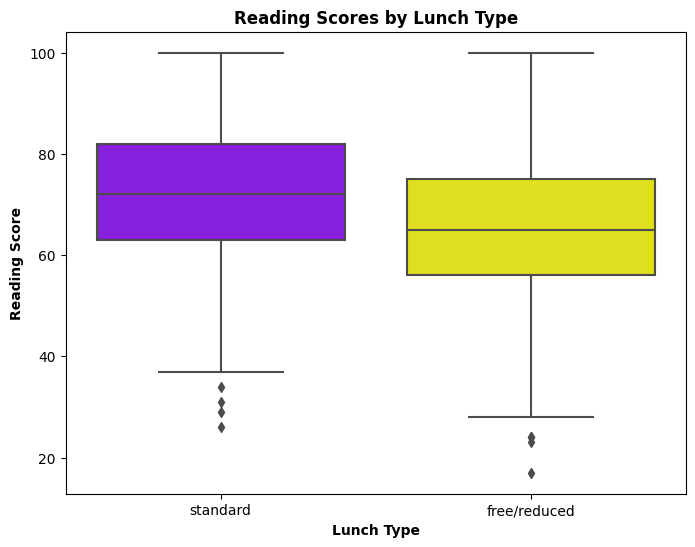

In [76]:
colors = {'standard': '#8B00FF', 'free/reduced':'#FFFF00'}
plt.figure(figsize=(8, 6))
sns.boxplot(x='lunch', y='reading_score', data=df, palette = colors)
plt.title('Reading Scores by Lunch Type', fontweight='bold')
plt.xlabel('Lunch Type', fontweight='bold')
plt.ylabel('Reading Score', fontweight='bold')

# **Problem Statement - 4**

**Is there a relationship between test preparation course completion and race/ethnicity?**

Examine whether the completion of a test preparation course is related to the race/ethnicity of students in the dataset

In [80]:

from scipy.stats import chi2_contingency

In [81]:
# null hypothesis (H0): Test preparation course completion and race/ethnicity are independent.
# alternative hypothesis (Ha): There is a relationship between test preparation course completion and race/ethnicity.


In [82]:
# chi-squared test is used to explore the relationship between two categorical variables


In [83]:
contingency_table = pd.crosstab(df['test_preparation_course'], df['race/ethnicity'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

In [84]:
alpha = 0.05


In [85]:
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Fail to reject the null hypothesis


In [86]:
print("Chi-Squared Statistic (chi2):", chi2)
print("Degrees of Freedom (dof):", dof)
print("Expected Frequencies (expected):")
print(expected)

Chi-Squared Statistic (chi2): 5.4875148857070695
Degrees of Freedom (dof): 4
Expected Frequencies (expected):
[[ 31.862  68.02  114.202  93.796  50.12 ]
 [ 57.138 121.98  204.798 168.204  89.88 ]]


There is a significant relationship between test preparation course completion and race/ethnicity. In other words, these two variables are not independent, and there is evidence of an association between them.

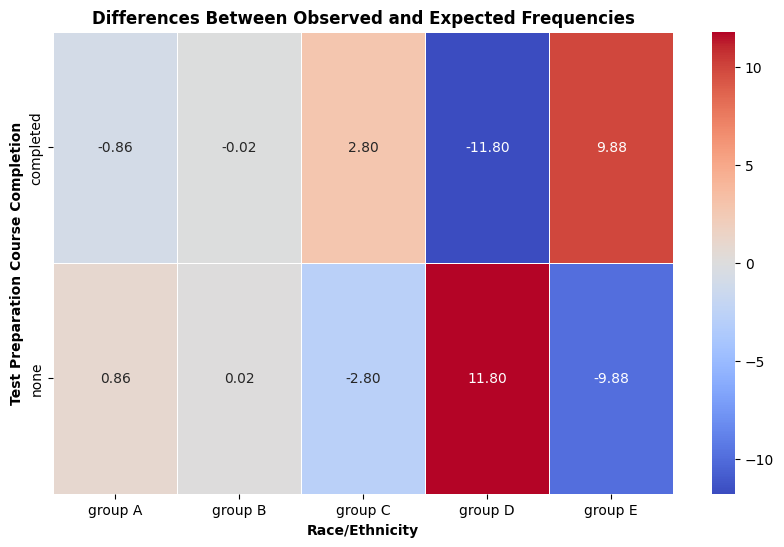

In [87]:
differences = contingency_table - expected
plt.figure(figsize=(10, 6))
sns.heatmap(differences, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Differences Between Observed and Expected Frequencies', fontweight='bold')
plt.xlabel('Race/Ethnicity', fontweight='bold')
plt.ylabel('Test Preparation Course Completion', fontweight='bold')
plt.show()

# **Problem Statement - 5**

**Predicting Pass/Fail Status**

We are building a predictive model to determine whether a student passes or fails the test based on factors such as gender, race/ethnicity, parental level of education, lunch type, and whether they completed a test preparation course.

In [88]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [89]:
df['total_marks'] = df['math_score'] + df['reading_score'] + df['writing_score']

In [90]:
threshold_percentage = 70

In [91]:

max_total_marks = 300

In [92]:
df['pass_status'] = df['total_marks'] >= (threshold_percentage / 100) * max_total_marks


In [93]:
X = df[['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']]
y = df['pass_status']

In [94]:
X = pd.get_dummies(X, drop_first=True)

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()


In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [98]:

y_pred = model.predict(X_test)

In [99]:

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Model Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)


Model Accuracy: 0.665
Classification Report:
               precision    recall  f1-score   support

       False       0.70      0.69      0.69       110
        True       0.63      0.63      0.63        90

    accuracy                           0.67       200
   macro avg       0.66      0.66      0.66       200
weighted avg       0.67      0.67      0.67       200



In conclusion, the logistic regression model achieved an overall accuracy of approximately 66.5% in predicting whether students would pass or fail the test based on their gender, race/ethnicity, parental level of education, lunch type, and test preparation course completion.